<a href="https://colab.research.google.com/github/gmazizi/ANN/blob/main/ANN_practical_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow


In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


In [3]:
#importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# dividing the dataset into dependent and independent features
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,-1]


In [5]:
#Featutre engineering (one hot encoding)
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)



In [6]:
x.head()
#drop Geagraphy and Gender from dataset and add encoded columns into the dataframe
x=x.drop(['Geography','Gender'], axis=1)


In [7]:
x=pd.concat([x,geography,gender], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [8]:
# Training set split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [9]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
x_test.shape

(2000, 11)

In [12]:
# Part-2 Lets create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [36]:
#initializing thge ANN
classifier=Sequential()
# adding the input layer
classifier.add(Dense(units=11, activation='relu'))

#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [37]:
# training the model
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# code for early stopping

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_history=classifier.fit(x_train,y_train, validation_split=0.33,
                             batch_size=10, epochs=1000,
                             callbacks=early_stopping)



Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.5890 - accuracy: 0.7542 - val_loss: 0.5009 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4941 - accuracy: 0.7994 - val_loss: 0.4503 - val_accuracy: 0.8084
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4608 - accuracy: 0.8130 - val_loss: 0.4345 - val_accuracy: 0.8266
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4325 - accuracy: 0.8248 - val_loss: 0.4183 - val_accuracy: 0.8315
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4142 - accuracy: 0.8365 - val_loss: 0.4052 - val_accuracy: 0.8342
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4066 - accuracy: 0.8399 - val_loss: 0.3959 - val_accuracy: 0.8387
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4005 - accuracy: 0.8405 - val_loss: 0.3900 - val_accuracy:

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

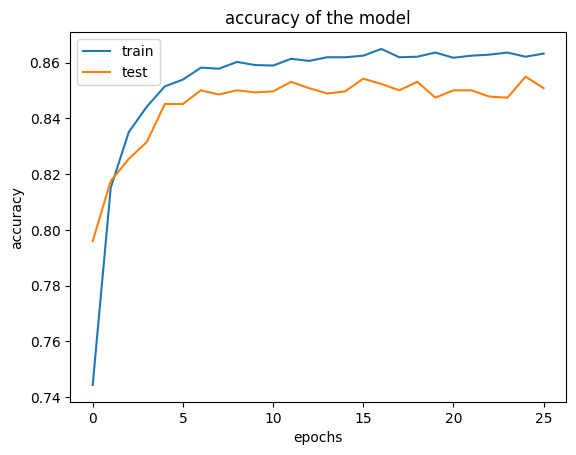

In [33]:
#summarizing history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('accuracy of the model')
plt.ylabel("accuracy")
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

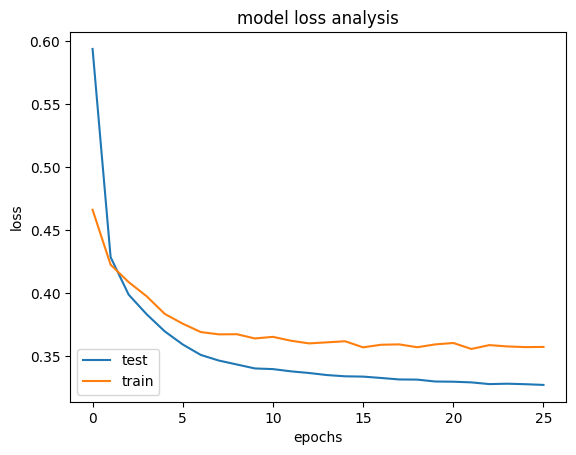

In [34]:
# sumarizing history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss analysis')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['test','train'],loc='lower left')
plt.show()

In [35]:
# making the predictions and evaluating the model
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)
# to get the weights.........classifier.get_weights()


63/63 [==============================] - 0s 1ms/step
[[1504   91]
 [ 191  214]]
0.859
